In [74]:
from tensorflow import keras
from Stats import Splitter
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pickle
np.random.seed(42)

In [2]:
df = pickle.load(open('scaled_df.pkl', 'rb'))
df = df.fillna(0)
df

,AvgFramesLeftTurn,AvgFramesRightTurn,AvgFramesMerge,AvgFramesUTurn,IntersectionMaxAcc,IntersectionAvgAcc,IntersectionVarAcc,IntersectionMaxYaw,IntersectionAvgYaw,IntersectionVarYaw,...,MergeMaxYaw,MergeAvgYaw,MergeVarYaw,UTurnMaxAcc,UTurnAvgAcc,UTurnVarAcc,UTurnMaxYaw,UTurnAvgYaw,UTurnVarYaw,Date
0,0.022657,-0.841095,0.000000,0.000000,-0.034730,0.569793,-0.107249,-0.677880,-0.170996,-0.322533,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.303128
1,-0.814371,-1.018391,0.000000,0.000000,-0.062706,0.447115,-0.703907,1.006835,-1.213577,1.010875,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.303128
2,-0.256352,-0.663798,0.000000,0.000000,-0.342463,-0.680043,-0.061242,-0.607683,0.184810,-0.363580,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.303128
3,0.000000,-1.018391,0.000000,0.000000,0.105148,-0.174470,-0.081112,-0.046111,-0.134974,-0.278161,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.303128
4,-0.814371,-0.841095,0.000000,0.000000,-0.370438,-0.420949,-0.385951,1.989586,-0.899950,3.905272,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.303128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,0.022657,0.000000,0.000000,0.000000,0.776564,1.722847,0.350910,0.024085,-0.397178,-0.253835,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.806791
1366,0.208663,-0.309205,0.000000,-0.276598,0.412880,-0.561455,0.233737,1.428014,0.891668,-0.072600,...,0.000000,0.000000,0.000000,0.862328,0.486498,1.014324,-0.270132,-0.263974,0.501930,1.806791
1367,0.301666,0.000000,0.000000,2.330281,0.245026,1.014603,0.014600,-0.467290,-0.127200,-0.230330,...,0.000000,0.000000,0.000000,0.337165,0.174637,0.217262,0.473558,0.797583,-0.646166,1.806791
1368,-0.256352,0.000000,-0.046796,0.000000,-0.398414,-1.162508,0.152984,-0.537487,0.358867,-0.362286,...,-0.210055,-0.126709,-0.321549,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.806791


In [ ]:
train_df = df[:1000]
val_df = df[1000:]
enrollment_df = val_df[(val_df.index % 10 < 5)]
verification_df = val_df[(val_df.index % 10 >= 5)]

In [10]:
train_data = train_df.to_numpy()
train_X = train_data[:, :-1]
train_Y = train_data[:, -1]
label_encoder = LabelEncoder()
train_integer_encoded = label_encoder.fit_transform(train_Y)
onehot_encoder = OneHotEncoder(sparse=False)
train_integer_encoded = train_integer_encoded.reshape(len(train_integer_encoded), 1)
train_Y_encoded = onehot_encoder.fit_transform(train_integer_encoded)
train_Y_encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [12]:
model = Sequential()
model.add(Dense(512, input_dim=64, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(100, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               33280     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               25700     
Total params: 190,308
Trainable params: 190,308
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(train_X, train_Y_encoded, epochs=200, batch_size=20, shuffle=True)

Epoch 1/200
50/50 [==============================] - 1s 2ms/step - loss: 4.5811 - accuracy: 0.0120
Epoch 2/200
50/50 [==============================] - 0s 2ms/step - loss: 4.1329 - accuracy: 0.1100
Epoch 3/200
50/50 [==============================] - 0s 2ms/step - loss: 3.6892 - accuracy: 0.1810
Epoch 4/200
50/50 [==============================] - 0s 2ms/step - loss: 3.2560 - accuracy: 0.2480
Epoch 5/200
50/50 [==============================] - 0s 2ms/step - loss: 2.8810 - accuracy: 0.3310
Epoch 6/200
50/50 [==============================] - 0s 2ms/step - loss: 2.5529 - accuracy: 0.3970
Epoch 7/200
50/50 [==============================] - 0s 2ms/step - loss: 2.2681 - accuracy: 0.4450
Epoch 8/200
50/50 [==============================] - 0s 2ms/step - loss: 2.0343 - accuracy: 0.5130
Epoch 9/200
50/50 [==============================] - 0s 2ms/step - loss: 1.8269 - accuracy: 0.5650
Epoch 10/200
50/50 [==============================] - 0s 2ms/step - loss: 1.6567 - accuracy: 0.6070
Epoch 11/

In [41]:
enrollment_data = enrollment_df.to_numpy()
verification_data = verification_df.to_numpy()
enrollment_data = enrollment_data[:, :-1]
verification_data = verification_data[:, :-1]
enrollment_pred = model.predict(enrollment_data)
verification_pred = model.predict(verification_data)

In [42]:
agg_enrollment_pred = np.mean(enrollment_pred.reshape(-1, 5, 100), axis=1)
agg_verification_pred = np.mean(verification_pred.reshape(-1, 5, 100), axis=1)
agg_verification_pred.shape

(37, 100)

In [58]:
# Generate (s, s) pairs
authorized_pairs = []
for i in range(len(agg_verification_pred)):
    pair = (agg_enrollment_pred[i], agg_verification_pred[i])
    authorized_pairs.append(pair)
imposter_pairs = []
# Generate (s, i) pairs
for i in range(len(agg_verification_pred)):
    random_i = i
    while random_i == i:
        random_i = np.random.randint(36)
    pair = (agg_enrollment_pred[i], agg_verification_pred[random_i])
    imposter_pairs.append(pair)

In [71]:
def calc_false_rejection(threshold: float):
    count = 0
    for i in range(len(authorized_pairs)):
        dist = np.linalg.norm(authorized_pairs[i][0] - authorized_pairs[i][1])
        if dist > threshold:
            # Authorized user is rejected
            count += 1
    return count/len(authorized_pairs)

def calc_false_acceptance(threshold: float):
    count = 0
    for i in range(len(imposter_pairs)):
        dist = np.linalg.norm(authorized_pairs[i][0] - authorized_pairs[i][1])
        if dist <= threshold:
            count += 1
    return count/len(imposter_pairs)


In [87]:
false_rejection_scores = []
false_acceptance_scores = []
thresholds = [x * 0.05 for x in range(0, 20)]
for threshold in thresholds:
    false_rejection = calc_false_rejection(threshold)
    false_accpetance = calc_false_acceptance(threshold)
    false_rejection_scores.append(false_rejection)
    false_acceptance_scores.append(false_accpetance)

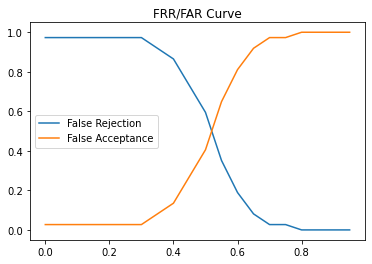

In [94]:
plt.plot(thresholds, false_rejection_scores, label='False Rejection')
plt.plot(thresholds, false_acceptance_scores, label='False Acceptance')
plt.title('FRR/FAR Curve')
plt.legend(loc='center left')
plt.show()